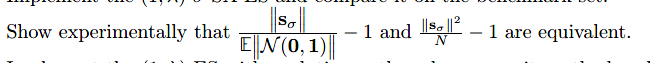


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")
sns.set(font = "arial")


def create_sigma_vector(n=2, sigma = 1):
    """Creates a random vector of length n and range sigma
    This is uniformaly distributed on the space of sigma"""

    return sigma*np.random.randn(n)


def calc_expected_len(n=2):
    # create random gausian
    lens = []
    for _ in range(100000):
        vec = np.random.randn(n)
        vec_len = np.linalg.norm(vec)
        lens.append(vec_len)

    exp_len = sum(lens)/len(lens)
    return exp_len


# need to repeat this many times
N = 2
func_ = []
exp_len = calc_expected_len(n=N)
for _ in range(100000):
    s_sig = create_sigma_vector(n=N, sigma=1)
    len_s_sig = np.linalg.norm(s_sig)
    func = len_s_sig/exp_len -1
    func_.append(func)

print("Mean: ", sum(func_)/len(func_))
print("SDev: ", statistics.stdev(func_))

Mean:  -0.00032428879078018715
SDev:  0.5215666910976894


In [6]:
func2_ = []
for _ in range(100000):
    s_sig = create_sigma_vector(n=N, sigma=1)
    len_s_sig = np.linalg.norm(s_sig)
    func = (len_s_sig**2)/2/N -1/2
    func2_.append(func)


print("Mean: ", sum(func2_)/len(func2_))
print("SDev: ", statistics.stdev(func2_))


Mean:  0.0007553343300746812
SDev:  0.5005480280532626


The means are equally centered on 0 but the Standard Deviation is double. Maybe a 1/2 in the exponent is missing?


Text(0.5, 1.0, 'Comparison of Formulas')

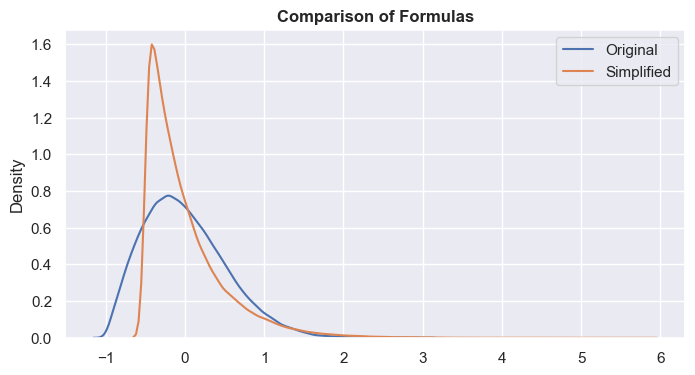

In [7]:
fig,ax = plt.subplots(figsize= (8,4))
import pandas as pd
sns.distplot(func_, ax = ax,hist=False)
sns.distplot(func2_, ax = ax,hist=False)
plt.gca().legend(('Original','Simplified'))
ax.set_title("Comparison of Formulas", fontweight="bold")

# Conclusion
1. The formula seems to have forgoten a 1/2 somewhere
2. The formula aproximation is closer the highest the values of the dimensions of the vector are
3. Betther to use the original formula for low samples and low dimensions
